<a href="https://colab.research.google.com/github/drskprabhakar/AI-ML-DL-colab-notebooks-coding-models/blob/main/DCR_thesis_FDDT_post_op_DAY1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

In [2]:
df = openpyxl.load_workbook('/content/drive/MyDrive/DCR thesis clean final data Dr shreyanka mane.xlsx')
df.sheetnames

['Ext dcr length',
 'Age and Gender',
 'ext DCR width',
 'Endo DCR length',
 'endo DCR width',
 'Inter DCR intraop OA',
 'Inter DCR post op day 1 OA',
 'Inter DCR postop 1 month OA',
 'Inter DCR post op 3 month OA']

In [3]:
day1fddt = pd.read_excel('/content/drive/MyDrive/DCR thesis clean final data Dr shreyanka mane.xlsx',sheet_name='Inter DCR post op day 1 OA')
day1fddt.columns

Index(['post op Day 1 EXT_DCR(L)', 'Post op Day 1 EXT_DCR (W)',
       'Post op Day 1 EXT_DCR (OA)', 'Post op day1 FDDT (Ext)',
       'post op Day 1 Endo_DCR (L)', 'Post op day 1 Endo_DCR (W)',
       'Post op day 1 Endo_DCR (OA)', 'Post op day1 FDDT (Endo)'],
      dtype='object')

In [20]:
x = day1fddt.drop(['post op Day 1 EXT_DCR(L)', 'Post op Day 1 EXT_DCR (W)',
        'Post op day1 FDDT (Ext)',
       'post op Day 1 Endo_DCR (L)', 'Post op day 1 Endo_DCR (W)',
       'Post op day 1 Endo_DCR (OA)', 'Post op day1 FDDT (Endo)'],axis=1).values
y = day1fddt['Post op day1 FDDT (Ext)'].values

In [22]:
x

array([[117.4044],
       [ 97.6885],
       [153.    ],
       [ 60.    ],
       [ 49.5   ],
       [ 85.5   ],
       [115.5   ],
       [100.98  ],
       [100.8   ],
       [128.    ],
       [ 78.2   ],
       [ 95.2   ],
       [ 91.    ],
       [136.8   ],
       [ 90.    ],
       [108.    ],
       [ 88.    ],
       [104.4   ],
       [ 88.4   ],
       [112.2   ],
       [ 87.6   ],
       [ 49.6   ],
       [154.    ],
       [124.8   ],
       [105.6   ]])

In [23]:
y

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1])

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [24]:
x_train,x_test,y_train,y_test

(array([[117.4044],
        [105.6   ],
        [ 91.    ],
        [153.    ],
        [ 78.2   ],
        [ 87.6   ],
        [ 90.    ],
        [124.8   ],
        [ 88.    ],
        [ 97.6885],
        [ 60.    ],
        [100.8   ],
        [104.4   ],
        [ 95.2   ],
        [128.    ],
        [115.5   ],
        [136.8   ],
        [ 49.6   ],
        [100.98  ],
        [ 85.5   ]]),
 array([[108. ],
        [154. ],
        [ 49.5],
        [112.2],
        [ 88.4]]),
 array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1]),
 array([1, 1, 1, 1, 1]))

In [26]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression()

In [28]:
y_predlog= logmodel.predict(x_test)
y_predlog

array([1, 1, 1, 1, 1])

In [34]:
logmodel.score(x_test,y_test)

1.0

In [30]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_predlog)


array([[5]])

In [9]:
X_train = day1fddt[['Post op Day 1 EXT_DCR (OA)']]  # Features for training
y_train = day1fddt['Post op day1 FDDT (Ext)']   # Target for training

X_test = day1fddt[['Post op Day 1 EXT_DCR (OA)']]   # Use the same feature name 'test1' for testing
y_test = day1fddt['Post op day1 FDDT (Ext)']    # Target for testing

from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)  # Now prediction should work


In [10]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred1)


array([[ 0,  3],
       [ 0, 22]])

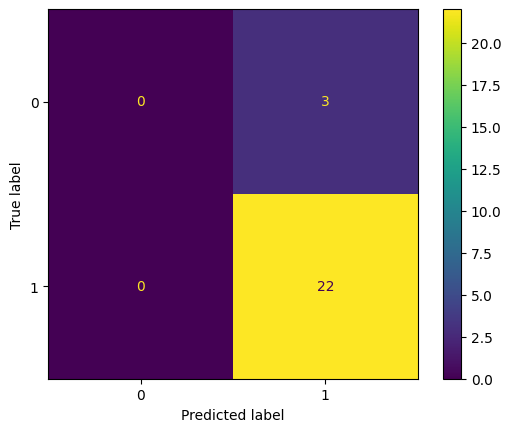

In [16]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)

In [15]:
metrics.accuracy_score(y_test, y_pred1)

0.88

In [12]:
model1.score(X_test, y_test)


0.88

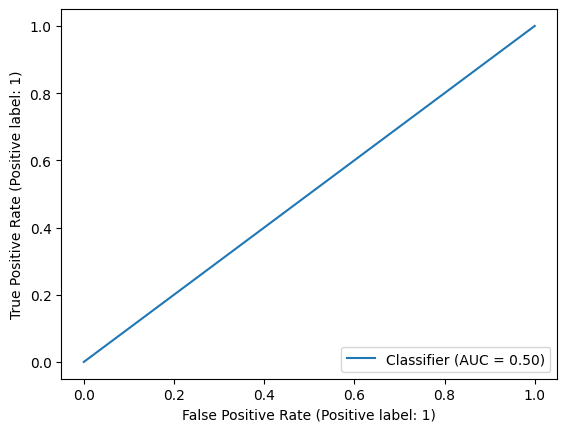

In [14]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred1)